In [1]:
#loading data set
from sklearn.datasets import load_iris
iris = load_iris()


In [65]:
import seaborn as sns

In [72]:
import numpy as np

<AxesSubplot:>

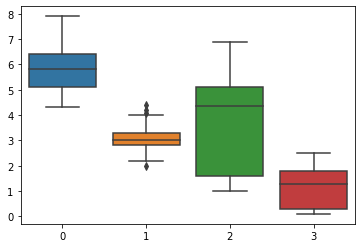

In [81]:
#finding outliers
sns.boxplot(data=iris.data)


In [93]:
#merging two numpy array to one
dataset = pd.DataFrame(iris.data)
dataset[4] = pd.DataFrame(iris.target)

In [125]:
dataset = dataset[(dataset[1]<3.9) & (dataset[1]>2.5)]
iris.data = np.array(dataset[[0,1,2,3]])
iris.target = np.array(dataset[4])

In [126]:
len(iris.data)

125

In [127]:
#manual seperation of test and train data
import random as r
train_percentage = 0.8
samples = r.sample(range(0,len(iris.data)),k=int(train_percentage*len(iris.data)))
X_Train = []
Y_Train = []
X_test = []
Y_test = []
TrainInd = 0
TestInd = 0
for i in range(len(iris.data)):
    if i in samples:
        X_Train.append(iris.data[i])
        Y_Train.append(iris.target[i])
   
    else:
        X_test.append(iris.data[i])
        Y_test.append(iris.target[i])
     
    

In [128]:
#training KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_Train,Y_Train)


KNeighborsClassifier(n_neighbors=3)

In [129]:
#predicting output
predicted_out = knn.predict(X_test)

In [130]:
#hecking accuracy using metrics
from sklearn import metrics
metrics.accuracy_score(Y_test,predicted_out)

1.0

In [131]:

for i in range(len(predicted_out)):
    if Y_test[i] != predicted_out[i]:
        print('real:',Y_test[i],'output:',predicted_out[i])

In [132]:
#finding K value for max accuracy
Accdic = {}
for i in range(1,int(len(X_Train)/3)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Train,Y_Train)
    predicted_out = knn.predict(X_test)
    Accdic[i] = metrics.accuracy_score(Y_test,predicted_out)

In [133]:
knn.predict([[6.3, 2.5, 4.9, 1.5]])

array([1])